## Processing data
The data comes from El Confidencial and the names are in Spanish and for my plot I needed to do some processing and translation. The data shows the weekly percentage or reported absents which is used an a proxy to estimate the rate of people taking vacations.

https://www.elconfidencial.com/economia/2024-11-30/este-grafico-demuestra-que-no-tenemos-por-que-irnos-de-vacaciones-todos-a-la-vez_4013958/

In [5]:
import pandas as pd
from datetime import datetime, timedelta
import pandas as pd
import plotnine as p9
import matplotlib.pyplot as plt
from matplotlib import font_manager


data = pd.read_csv('../data/data-xzChE.csv')

df_long = data.melt(
    id_vars=['Fecha'], 
    var_name='country', 
    value_name='percentage'
)

# Create the translation dictionary for country names
country_translation = {
    "UE27": "EU27",
    "España": "Spain",
    "Austria": "Austria",
    "Bélgica": "Belgium",
    "Croacia": "Croatia",
    "Chipre": "Cyprus",
    "Rep. Checa": "Czech Republic",
    "Dinamarca": "Denmark",
    "Finlandia": "Finland",
    "Francia": "France",
    "Alemania": "Germany",
    "Grecia": "Greece",
    "Hungría": "Hungary",
    "Irlanda": "Ireland",
    "Italia": "Italy",
    "Países Bajos": "Netherlands",
    "Noruega": "Norway",
    "Polonia": "Poland",
    "Portugal": "Portugal",
    "Serbia": "Serbia",
    "Eslovaquia": "Slovakia",
    "Eslovenia": "Slovenia",
    "Reino Unido": "United Kingdom"
}

# Chain the operations similar to R's pipe
data = (
    df_long.assign(
        # Convert 'Fecha' to datetime
        date_column=pd.to_datetime(df_long['Fecha'], format="%d/%m/%Y"),
        
        # Clean and convert 'percentage' column
        percentage=(
            df_long['percentage']
            .str.replace('%', '', regex=False)
            .str.replace(',', '.', regex=False)
            .pipe(pd.to_numeric)
        ),
        
        # Translate country names
        country_english=df_long['country'].replace(country_translation)
    )
)


unique_countries = data['country'].unique().tolist()
print(unique_countries)


data = data.assign(
    # Extract ISO week number
    week=data['date_column'].dt.isocalendar().week,
    
    # Extract day of the week (Monday=0, Sunday=6)
    # .dt.day_name() gives the name like "Monday"
    day=data['date_column'].dt.day_name() 
)

data_all = data[data['country_english'] != 'EU27'].copy()


# I want to show month as labels and this code helps with that
monthly_breaks = pd.date_range(start='2024-01-01', end='2024-12-01', freq='MS')
monthly_labels = [d.strftime('%b') for d in monthly_breaks]
monthly_breaks_centered = [d + pd.offsets.Day(15) for d in monthly_breaks]


['UE27', 'España', 'Austria', 'Bélgica', 'Croacia', 'Chipre', 'Rep. Checa', 'Dinamarca', 'Finlandia', 'Francia', 'Alemania', 'Grecia', 'Hungría', 'Irlanda', 'Italia', 'Países Bajos', 'Noruega', 'Polonia', 'Portugal', 'Serbia', 'Eslovaquia', 'Eslovenia', 'Reino Unido']


## Font 

In [2]:
font_path = "/Users/mcnakhaee/Library/Fonts/Merriweather-VariableFont_opsz,wdth,wght.ttf"
font_family = font_manager.FontProperties(fname=font_path)
font_name = font_family.get_name()
plt.rcParams['font.family'] = font_family.get_name()


## Plotting

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/plotnine/themes/themeable.py:2486: FutureWarning: You no longer need to use subplots_adjust to make space for the legend or text around the panels. This parameter will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.


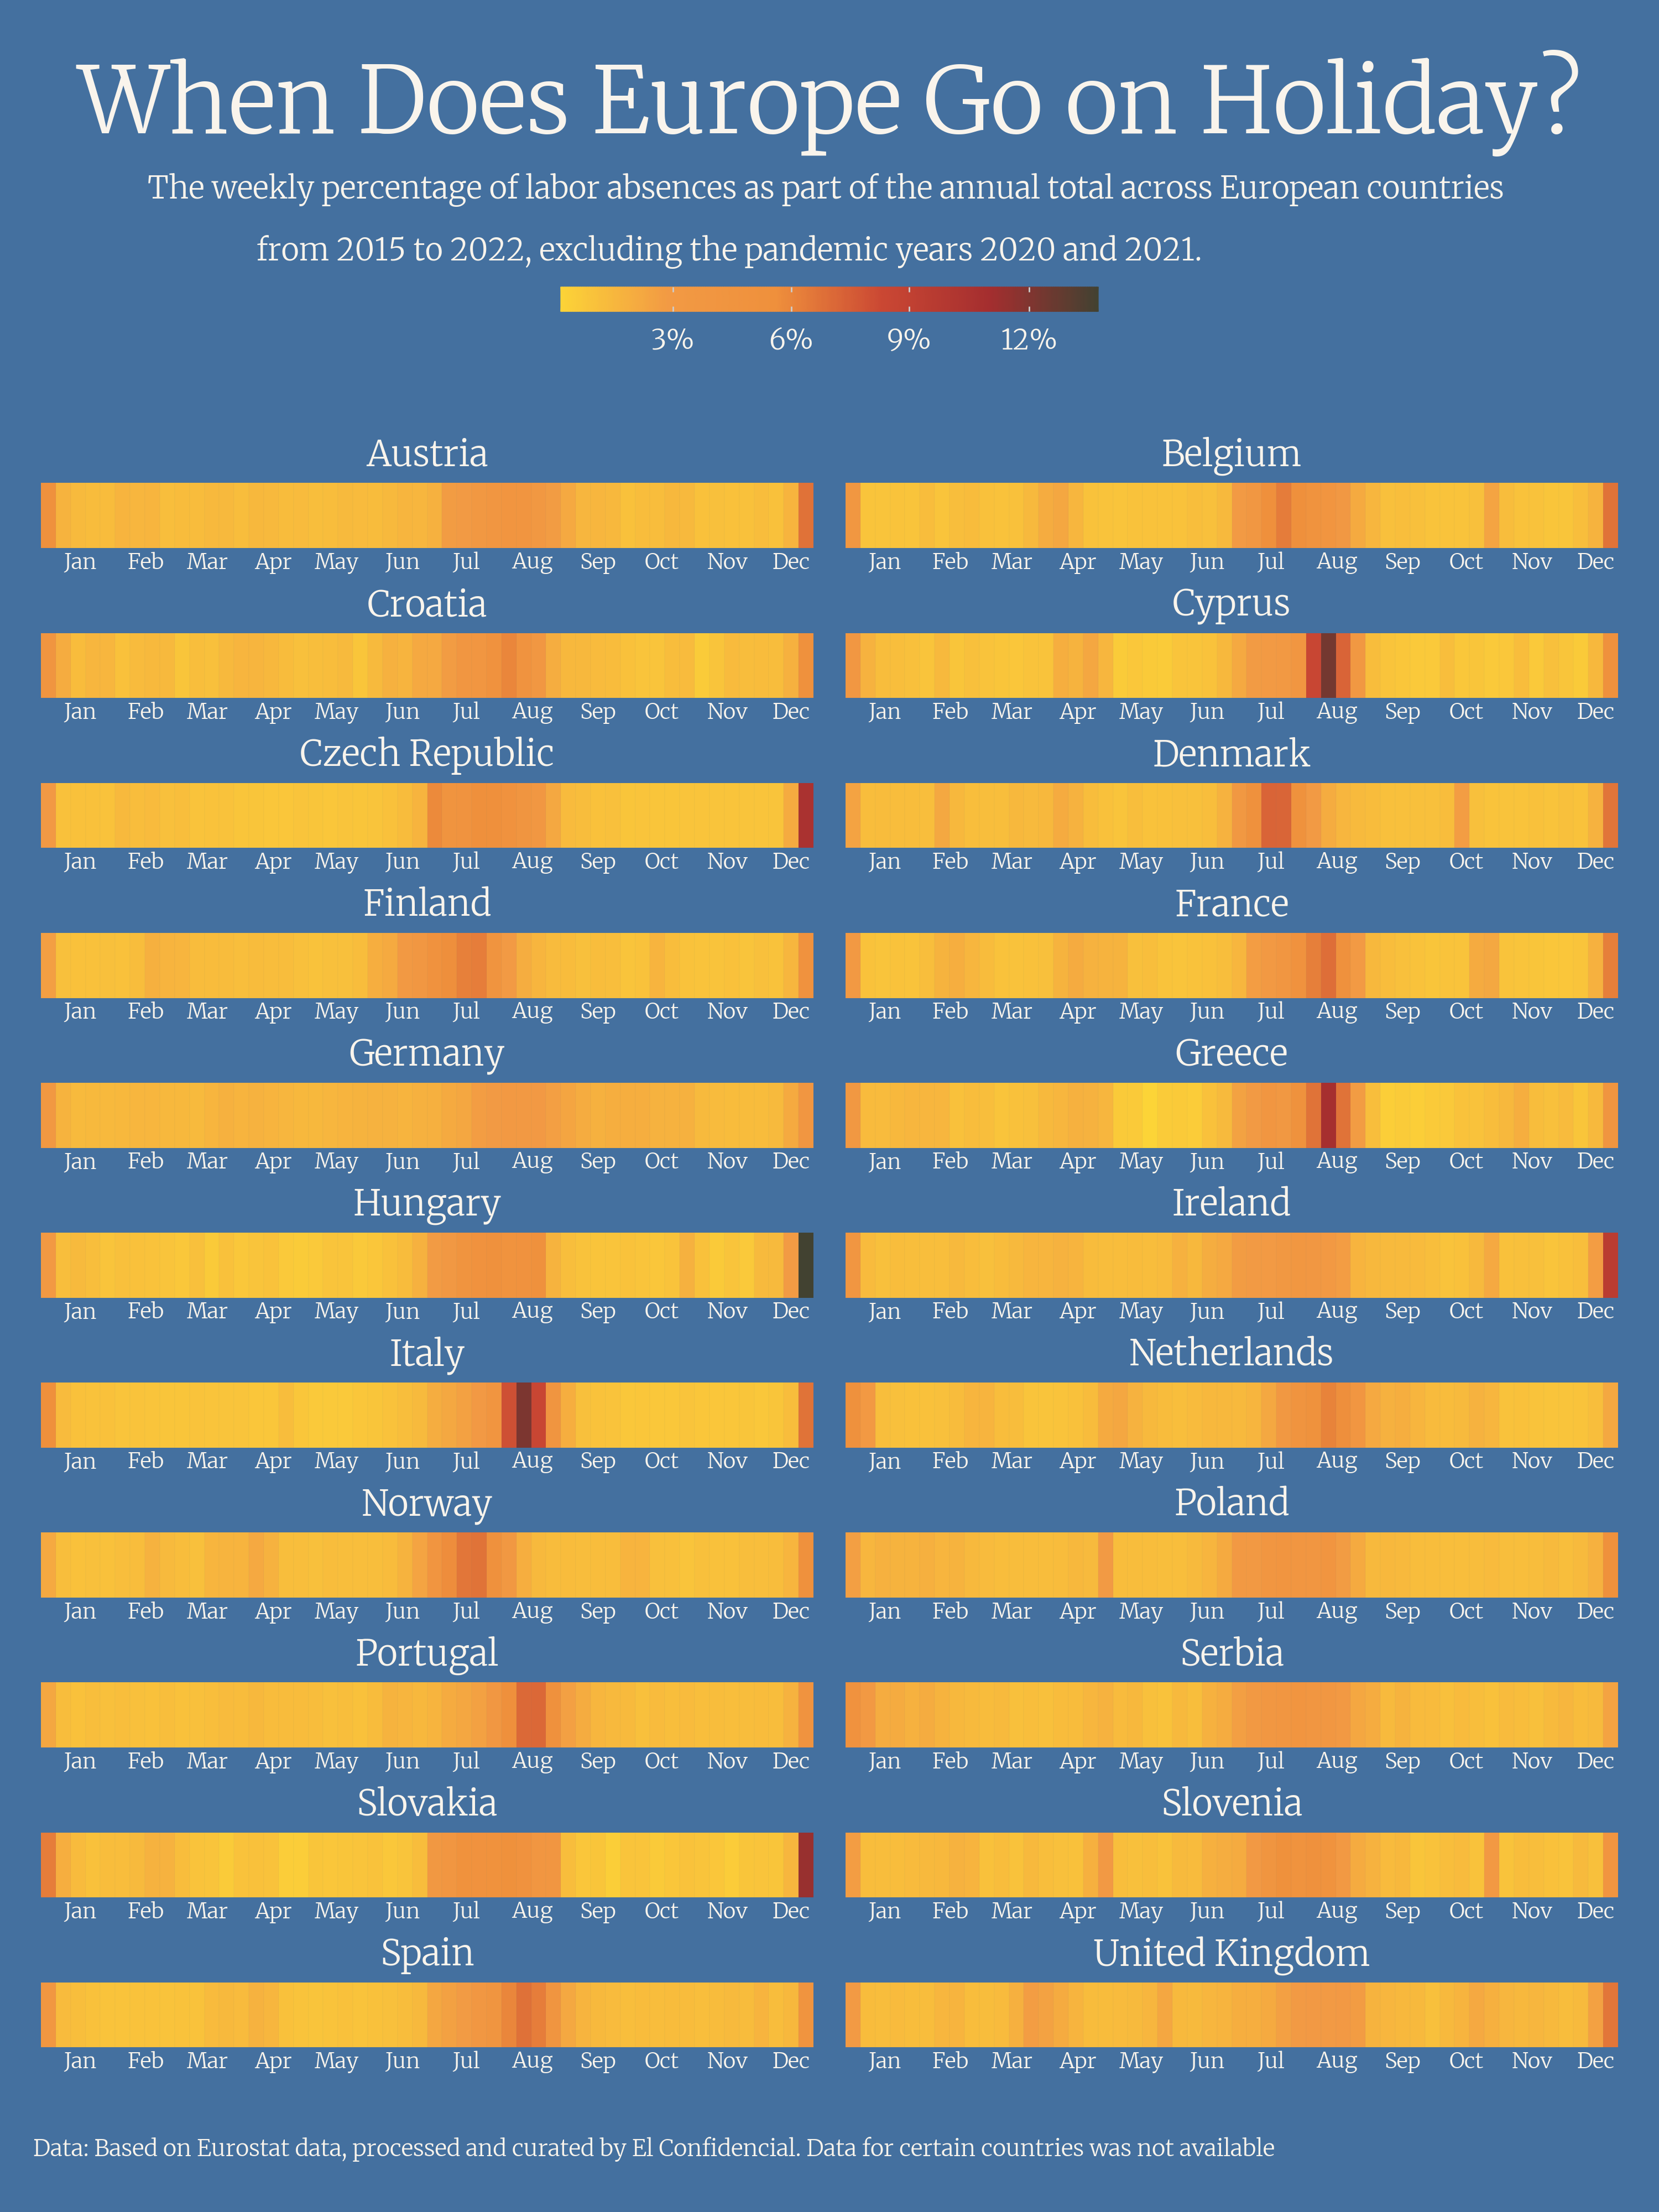

In [11]:

bg_color = '#44709F'
tile_color = '#44709F'
text_color = '#F9F4EC'

plot_all = (
    p9.ggplot(data_all, p9.aes(x='date_column', y=1, fill='percentage'))
    # tiles
    + p9.geom_tile(color=tile_color, size=0.008)
    # monthly scales
    + p9.scale_x_datetime(
    breaks=monthly_breaks_centered,
    labels=monthly_labels,
    expand=(0.01, 0.01)
)     # the color scale for the percentage scale
    + p9.scale_fill_gradientn(
        name="Percentage",
        colors=['#FCD437', '#F29A44', '#EF903C', '#CA4733', '#A42E2F', '#424231'],
        breaks=[0, 3, 6, 9, 12, 15],
        labels=[f'{i}%' for i in [0, 3, 6, 9, 12, 15]],
    )
    + p9.facet_wrap('~country_english', ncol=2, scales="free")
    + p9.labs(
        title="When Does Europe Go on Holiday?",
        subtitle="The weekly percentage of labor absences as part of the annual total across European countries \n\n               from 2015 to 2022, excluding the pandemic years 2020 and 2021.",
        x="",
        y="",
        caption="Data: Based on Eurostat data, processed and curated by El Confidencial. Data for certain countries was not available"
    )
    + p9.theme_void(base_family=font_name)
    + p9.theme(
        figure_size=(15, 20),
        panel_grid=p9.element_blank(),
        axis_ticks_y=p9.element_blank(),
        axis_text_y=p9.element_blank(),
        axis_ticks_x=p9.element_blank(),
        axis_text_x=p9.element_text(color=text_color, size=14, ha='center'),
        # legend theme settings
        legend_key_width=350,
        legend_key_height=15.5,
        legend_box_spacing=0.05,
        legend_box_margin=0.05,
        legend_justification='center',
        legend_direction='horizontal',
        legend_box='horizontal',
        strip_text_x=p9.element_text(size=23, color=text_color, margin={'b': 5.1, 't': 5}, weight='bold'),
        plot_title=p9.element_text(size=60, ha='center', color=text_color, weight='bold'),
        plot_subtitle=p9.element_text(size=20, ha='center', color=text_color),
        plot_caption=p9.element_text(size=15, color=text_color, ha='left', margin={'b': 15.1, 't': 55}),
        legend_text=p9.element_text(size=18, color=text_color, weight='bold'),
        legend_title=p9.element_blank(),
        plot_background=p9.element_rect(fill=bg_color, color=bg_color),
        panel_background=p9.element_rect(fill=bg_color, color=bg_color),
        plot_margin_bottom=0.02,
        plot_margin_left=0.02,
        plot_margin_right=0.02,
        plot_margin_top=0.03,
        legend_position='top',
        subplots_adjust={'top': 10.1, 'bottom': 10.1}
    )
)


plot_all

In [9]:
plot_all.save(filename="../plot/holidays_in_Europe.pdf", width=15, height=20, units="in")

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/plotnine/ggplot.py:630: PlotnineWarning: Saving 15 x 20 in image.
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/plotnine/ggplot.py:631: PlotnineWarning: Filename: ../plot/holidays_in_Europe.pdf
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/plotnine/themes/themeable.py:2486: FutureWarning: You no longer need to use subplots_adjust to make space for the legend or text around the panels. This parameter will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.


In [10]:
plot_all.save(filename="../plot/holidays_in_Europe.png", width=21, height=25, units="in",dpi=300)


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/plotnine/ggplot.py:630: PlotnineWarning: Saving 21 x 25 in image.
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/plotnine/ggplot.py:631: PlotnineWarning: Filename: ../plot/holidays_in_Europe.png
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/plotnine/themes/themeable.py:2486: FutureWarning: You no longer need to use subplots_adjust to make space for the legend or text around the panels. This parameter will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.
